**DIABETES CLASSIFICATION**


In [1]:
# Here we will import the libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We shall import the data to a DataFrame
from google.colab import files
uploaded = files.upload()

Saving diabetes_csv.csv to diabetes_csv (1).csv


In [3]:
# Converting it into a dataframe
df= pd.read_csv('diabetes_csv.csv')
df[:5]  # Displaying 1st 5 observations

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)
* Class variable (0 or 1)
* Class Distribution: (class value 1 is interpreted as "tested positive for
diabetes")



In [4]:
# Renaming the columns
df.rename(columns= {'preg':'n_pregnant','plas':'plasma','pres':'pressure','insu':'insulin','mass':'bmi','pedi':'pedigree'}, inplace= True)
df[:5]

,n_pregnant,plasma,pressure,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [11]:
# class labelling
def labelling(param):
  if param == 'tested_positive':
    param = 1
    return param
  else:
    param = 0
    return param

df_new= df['class'].apply(lambda x: labelling(x))

In [21]:
df_new.to_list()[:5]

[1, 0, 1, 0, 1]

In [22]:
df['class_cat'] = df_new

In [23]:
df[:5]

,n_pregnant,plasma,pressure,skin,insulin,bmi,pedigree,age,class,class_cat
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [25]:
# Now let's remove the class column
df.drop(columns= 'class', axis=1,inplace=True)

In [26]:
df[:5]

,n_pregnant,plasma,pressure,skin,insulin,bmi,pedigree,age,class_cat
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Now we will check for missing values
df.isna().sum()
# Here we can see that there are no missing values present

n_pregnant    0
plasma        0
pressure      0
skin          0
insulin       0
bmi           0
pedigree      0
age           0
class_cat     0
dtype: int64

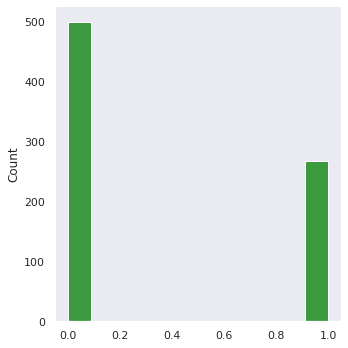

In [49]:
# we shall see how many values totally are tested_positive(1) and tested_negative(0)
df['class_cat'].value_counts()
sns.displot(df['class_cat'].values, kde= False, color='green')
sns.set_theme(style='dark', palette='rainbow')
# so we see that there are 500 negativelt tested patients and 268 tested for positive for Diabetes mellitus

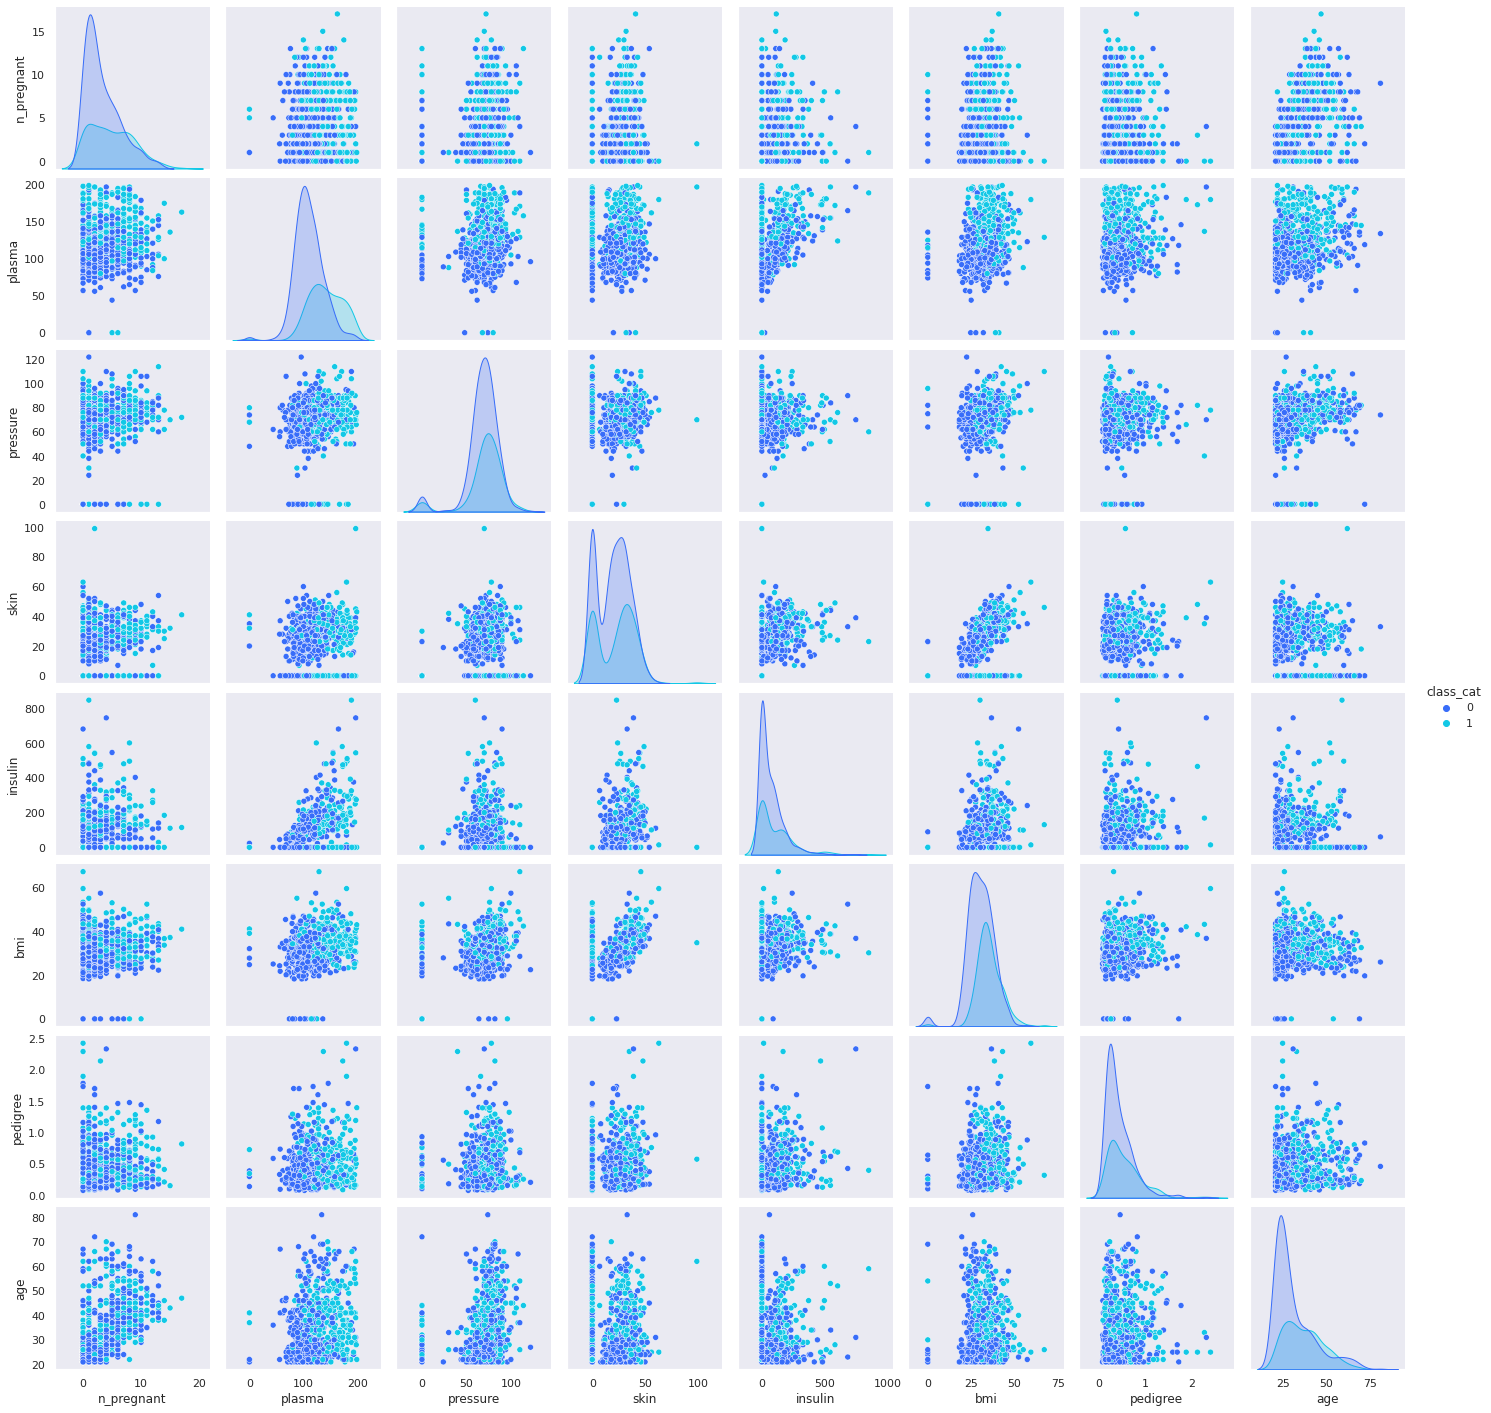

In [50]:
# Now we will see the plot of the entire dataset
sns.pairplot(df, hue= 'class_cat')
sns.set_theme(style='dark', palette='rainbow')

We can see that the both the datapoints of 0 and 1 and present close to each other, so choosing a correct k value of KNN Classifier is important

In [51]:
# Now let's look into the summary of dataframe
df.describe()

,n_pregnant,plasma,pressure,skin,insulin,bmi,pedigree,age,class_cat
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* For age feature we see that minimum age found in patient is 21 and maximum age of a patient is found to be 81
* On an average, there are people who are aged at around 29-33 years are the patients

In [60]:
print("minimum age of a patient who has been tested positive for diabetes", min(df['age'][df['class_cat']==1])) 
print("maximum age of a patient who has been tested positive for diabetes", max(df['age'][df['class_cat']==1])) 

minimum age of a patient who has been tested positive for diabetes 21
maximum age of a patient who has been tested positive for diabetes 70


In [70]:
print("Number of patients who have been pregnant more than 2 times", df['n_pregnant'][df['n_pregnant'] > 2].count())
print("Number of patients who have been pregnant more than 3 times", df['n_pregnant'][df['n_pregnant'] > 3].count())
print("Number of patients who have been pregnant more than 4 times", df['n_pregnant'][df['n_pregnant'] > 4].count())

Number of patients who have been pregnant more than 2 times 419
Number of patients who have been pregnant more than 3 times 344
Number of patients who have been pregnant more than 4 times 276


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


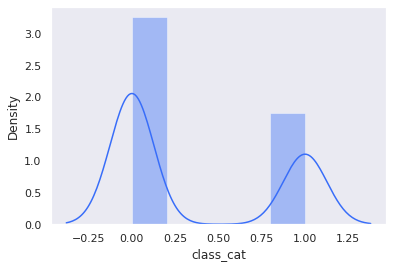

In [73]:
# Let's look into how the distribution of target array
sns.distplot(df['class_cat'])
# We can see that the distribution is normal for both the categories

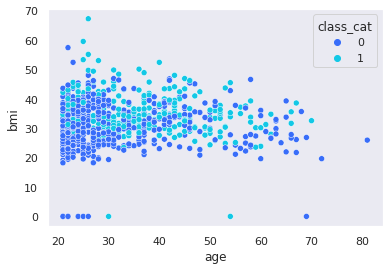

In [78]:
sns.scatterplot(x=df['age'],y=df['bmi'], hue=df['class_cat'],data= df)
# we can see that younger patients has more BMI as compared to older people as expected
# But there are few outliers in the data

* Now, it's time for ML Classification
* First, we shall scale the data we have

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
df.columns

Index(['n_pregnant', 'plasma', 'pressure', 'skin', 'insulin', 'bmi',
       'pedigree', 'age', 'class_cat'],
      dtype='object')

In [82]:
scaler.fit(df[['n_pregnant', 'plasma', 'pressure', 'skin', 'insulin', 'bmi', 'pedigree', 'age']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
scaled_features = scaler.transform(df[['n_pregnant', 'plasma', 'pressure', 'skin', 'insulin', 'bmi', 'pedigree', 'age']])
scaled_features[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [86]:
# Now we shall create X and y
X= pd.DataFrame(scaled_features, columns= df.columns[:-1])
y= df['class_cat']

In [87]:
X[:5]   # scaled feature matrix

,n_pregnant,plasma,pressure,skin,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [88]:
y[:5] # target array

0    1
1    0
2    1
3    0
4    1
Name: class_cat, dtype: int64

In [90]:
# time to split the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)

In [91]:
# 1st we try KNN model with k=1 and see the accuracy
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [92]:
# We train the model now
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [93]:
# We test the model now 
predict = model.predict(X_test)
predict[:5]

array([0, 1, 0, 1, 1])

In [94]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: class_cat, dtype: int64

In [96]:
df['class_cat'].value_counts()

0    500
1    268
Name: class_cat, dtype: int64

In [95]:
# We will evaluate the model using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict))

print("Classification report:")
print(classification_report(y_test, predict))

Confusion Matrix:
[[108  43]
 [ 44  36]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       151
           1       0.46      0.45      0.45        80

    accuracy                           0.62       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.62      0.62       231



* from the confusion matrix we see that, out of 151 category 0 labels, only 108 have been predicted correctly as cat 0 and 43 predicted wrongly as cat 1
* which gives the accuracy of predicting the cat 0 is 0.71

* out of 80 category 1 labels, only 44 predcied wrongly as cat 0 and just 36 predicted correctly as cat 1
* which gives the accuracy of predicting the cat 1 is 0.45

* So, for k=1, the overall acuuracy is just 0.62 or 62%

In [97]:
# Now we shall choose a better k value 
error_rate = []

In [98]:
for i in range(1,40):
  model_i = KNeighborsClassifier(n_neighbors=i)
  model_i.fit(X_train, y_train)
  predict_i = model_i.predict(X_test)
  error_rate.append(np.mean(predict_i != y_test))

Text(0, 0.5, 'Error rate ---->')

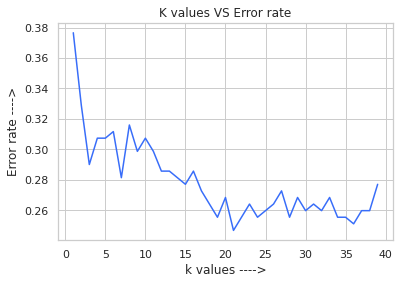

In [104]:
# We shall plot K values vs Error rate and choose the best value of k
sns.lineplot(x=range(1,40), y= error_rate)
sns.set_style('whitegrid')
plt.title("K values VS Error rate")
plt.xlabel("k values ---->")
plt.ylabel("Error rate ---->")

**We can choose k=21, as it is having the least error rate**

In [105]:
model_final = KNeighborsClassifier(n_neighbors=21)

In [106]:
model_final.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [107]:
predict_final = model_final.predict(X_test)

In [108]:
predict_final[:5]

array([0, 0, 0, 0, 1])

In [109]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: class_cat, dtype: int64

In [110]:
# Model Evaluation
# We will evaluate the model using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict_final))

print("Classification report:")
print(classification_report(y_test, predict_final))

Confusion Matrix:
[[132  19]
 [ 38  42]]
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.53      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



* So finally we were able to achieve the maximum accuracy of 75%, which is actually bad

* Since the data had limited observations, accuracy of the model is low